In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image


%matplotlib inline

## Task 1.

### 1.A

For each subsequent year, we apply the transition matrix \( T \) to the distribution from the previous year. Therefore, the distribution for year \( i \) is given by:

\begin{equation}
x_i = T^{i}x_0
\end{equation}

where $T^i$ is the matrix $T$ raised to the power $i$.

In [ ]:
T = np.array([[0.99, 0.2],
              [0.01, 0.8]])

# Initial distribution in 2023
x_0 = np.array([0.3, 0.7])
distributions = [x_0]

for _ in range(100):
    x_next = T.dot(distributions[-1])
    distributions.append(x_next)

distributions = np.array(distributions)

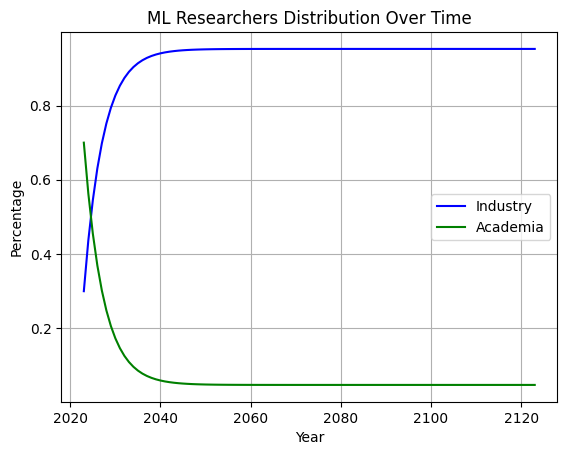

In [ ]:
years = list(range(2023, 2124))
plt.plot(years, distributions[:, 0], label='Industry', color='blue')
plt.plot(years, distributions[:, 1], label='Academia', color='green')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('ML Researchers Distribution Over Time')
plt.legend()
plt.grid(True)
plt.show()

### 1.B

In [ ]:
x_0_alt = np.array([0.10, 0.90]) # alternative input
distributions_alt = [x_0_alt]

for _ in range(100):
    x_next_alt = T.dot(distributions_alt[-1])
    distributions_alt.append(x_next_alt)

distributions_alt = np.array(distributions_alt)


print("Distubtion in 2123 (Default):")
print(f"Industry: {distributions[-1, 0]:.2%}")
print(f"Academia: {distributions[-1, 1]:.2%}")

print("Distribution in 2123 (Alternative):")
print(f"Industry: {distributions_alt[-1, 0]:.2%}")
print(f"Academia: {distributions_alt[-1, 1]:.2%}")

Distubtion in 2123 (Default):
Industry: 95.24%
Academia: 4.76%
Distribution in 2123 (Alternative):
Industry: 95.24%
Academia: 4.76%


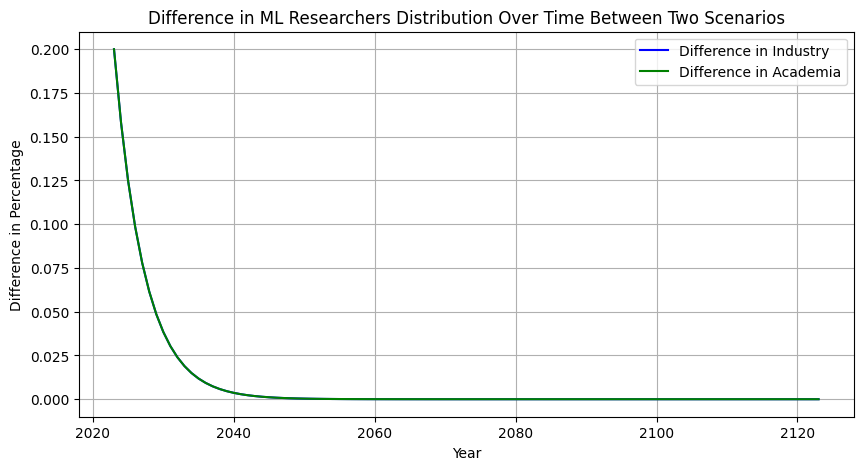

Difference in 2123 for Industry: 0.00%
Difference in 2123 for Academia: 0.00%


In [ ]:
# Calculate the absolute differences between the two scenarios
difference_industry = np.abs(distributions[:, 0] - distributions_alt[:, 0])
difference_academia = np.abs(distributions[:, 1] - distributions_alt[:, 1])

# Plot the differences
plt.figure(figsize=(10, 5))
plt.plot(years, difference_industry, label='Difference in Industry', color='blue')
plt.plot(years, difference_academia, label='Difference in Academia', color='green')
plt.xlabel('Year')
plt.ylabel('Difference in Percentage')
plt.title('Difference in ML Researchers Distribution Over Time Between Two Scenarios')
plt.legend()
plt.grid(True)
plt.show()

# Display the difference in 2123
print(f"Difference in 2123 for Industry: {difference_industry[-1]:.2%}")
print(f"Difference in 2123 for Academia: {difference_academia[-1]:.2%}")


### 1.C

Both scenarios converged to the same distribution over time, regardless of their different starting points.

The eigenvector corresponding to the eigenvalue $1$ is the steady-state distribution. When the system reaches this distribution, multiplying by the transition matrix $T$ doesn't change the distribution any further.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(T)

print("Eigenvalues:", eigenvalues)
print("\nEigenvectors:", eigenvectors)

Eigenvalues: [1.   0.79]

Eigenvectors: [[ 0.99875234 -0.70710678]
 [ 0.04993762  0.70710678]]


# **GRADED ASSIGNMENT 3 - Task 2**

This is a programming task dedicated to SVD.

First, make your own copy of the notebook (*File $\rightarrow$ Save a copy in Drive*) or download the notebook to your machine if you prefer to work locally (*File $\rightarrow$ Download*).

Then, implement your solutions to the tasks formulated in the notebook. You can add **code cells** to write some code and **text cells** in case you want to include additional explanations to your answers in plain English.

Finally, attach the link to thi snotebook the submission form. **Make sure that all the cells are executed and all relevant outputs are being printed out**.


## Image compression with SVD

We have seen that SVD allows one to decompose any $m \times n$ matrix $A$, into the product of the orthogonal matrices $U$ and $V$ and a "diagonal" matrix $\Sigma$:

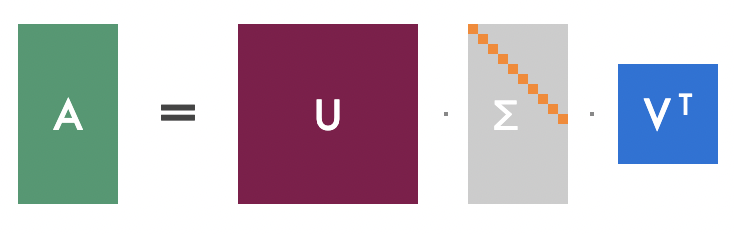

We have also discussed that we can *approximate* the original matrix $A$ by using only some parts of the matrices $U, V$ and $\Sigma$:

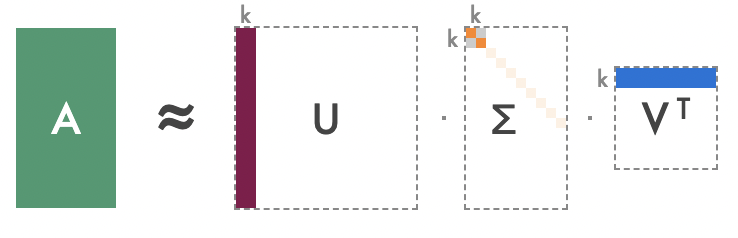

You can notice that this approximation can help us save quite a lot of space. Indeed, inspeat of storing $m \times n$ of the original values in A we now need to store only $m \times k + k + k \times n = k \times (m + n + 1)$ values. **Since images can be represented as matrices of pixel values, we can use this idea and compress images with SVD!**

Here are some videos that explain this idea and give some examples that you might want to watch before attempting the task:
- [SVD and Image Compression](https://youtu.be/DG7YTlGnCEo)
- [SVD: Image Compression in Python](https://youtu.be/H7qMMudo3e8)

First, let's load the image into a $\texttt{numpy}$ array and display it.

You can use *any* image of your choice, or upload one of the sample images provided [in our repo](https://github.com/girafe-ai/math-basics-for-ai/tree/master/graded%20assignments/img).

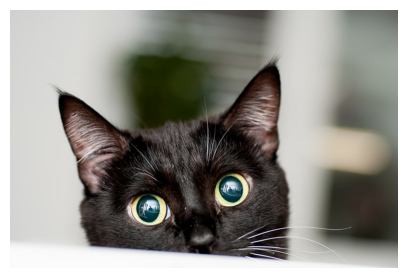

In [ ]:
path = "https://raw.githubusercontent.com/girafe-ai/math-basics-for-ai/master/graded%20assignments/img/sample-images-svd/cat.jpeg" # Specify path to the image (e.g., url)

with urllib.request.urlopen(path) as url:
    img_rgb = np.array(Image.open(url))


plt.figure(figsize=(5, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

Note how image is represented in the RGB format:

In [ ]:
print(img_rgb.shape)
img_rgb

(533, 800, 3)


array([[[208, 208, 206],
        [208, 208, 206],
        [208, 208, 206],
        ...,
        [101, 101,  91],
        [101, 101,  91],
        [101, 101,  91]],

       [[208, 208, 206],
        [208, 208, 206],
        [208, 208, 206],
        ...,
        [101, 101,  91],
        [101, 101,  91],
        [101, 101,  91]],

       [[208, 208, 206],
        [208, 208, 206],
        [208, 208, 206],
        ...,
        [102, 102,  92],
        [102, 102,  92],
        [102, 102,  92]],

       ...,

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [198, 198, 196],
        [198, 198, 196],
        [198, 198, 196]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [202, 202, 200],
        [201, 201, 199],
        [201, 201, 199]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]]

For simplicity, let's make our image black-and-white (this way, we'll only need to work with a single channel). We'll do this by averaging the signals from the red, green and blue channels for each pixel.

In [ ]:
img_grayscale = np.mean(img_rgb, axis=-1)

Now, our image is represented as an $m \times n$ matrix:

In [ ]:
print(img_grayscale.shape)
img_grayscale

(533, 800)


array([[207.33333333, 207.33333333, 207.33333333, ...,  97.66666667,
         97.66666667,  97.66666667],
       [207.33333333, 207.33333333, 207.33333333, ...,  97.66666667,
         97.66666667,  97.66666667],
       [207.33333333, 207.33333333, 207.33333333, ...,  98.66666667,
         98.66666667,  98.66666667],
       ...,
       [251.        , 251.        , 251.        , ..., 197.33333333,
        197.33333333, 197.33333333],
       [251.        , 251.        , 251.        , ..., 201.33333333,
        200.33333333, 200.33333333],
       [251.        , 251.        , 251.        , ..., 205.        ,
        205.        , 205.        ]])

We can plot the grayscale image:

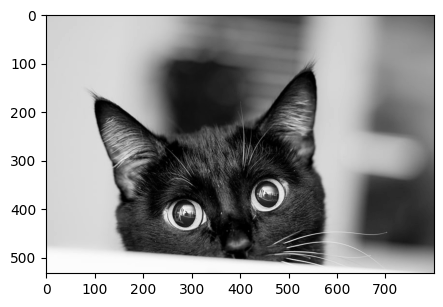

In [ ]:
plt.figure(figsize=(5, 10))
plt.imshow(img_grayscale, cmap='gray')

Apply SVD on the image matrix $M$, decomposing it into the product of the orthogonal matrices $U$ and $V$ and a "diagonal" matrix $\Sigma$:

$$M_{m \times n} = U_{m \times m} \Sigma_{m \times n} V_{n \times n}^T$$

*You can use [$\texttt{np.linalg.svd()}$](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) to perform SVD.*

In [ ]:
U, sigma, V = np.linalg.svd(img_grayscale)

**(1 point)** Demonstrate how you can get your image matrix back as a product of $U$, $V$ and $\Sigma$ *(express image matrix $M$ as a product of the three matrices and plot the resulting image, making sure it's the same as before)*.

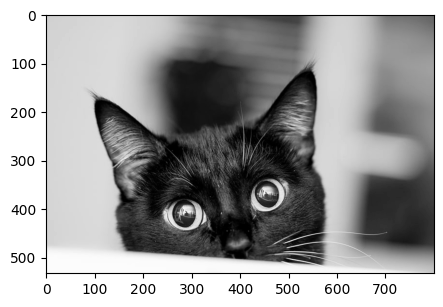

In [ ]:
Sigma = np.zeros_like(img_grayscale)
for i in range(len(sigma)):
    Sigma[i, i] = sigma[i]

img_reconstructed = np.dot(U, np.dot(Sigma, V))

plt.figure(figsize=(5, 10))
plt.imshow(img_reconstructed, cmap='gray')
plt.show()

Now, let's compress the original image! Remember that with SVD, you can approximate the original  matrix by considering only $p$ of the hidden features:

$$M_{m \times n} \approx U_{m \times p} \Sigma_{p \times p} V_{n \times p}^T$$

**(2 points)** Try reconstructing the image by using only $5, 10, ..., 100$ hidden features. Plot what happens.

*Hint: use [$\texttt{plt.subplot()}$](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) to place several images on the same plot.*

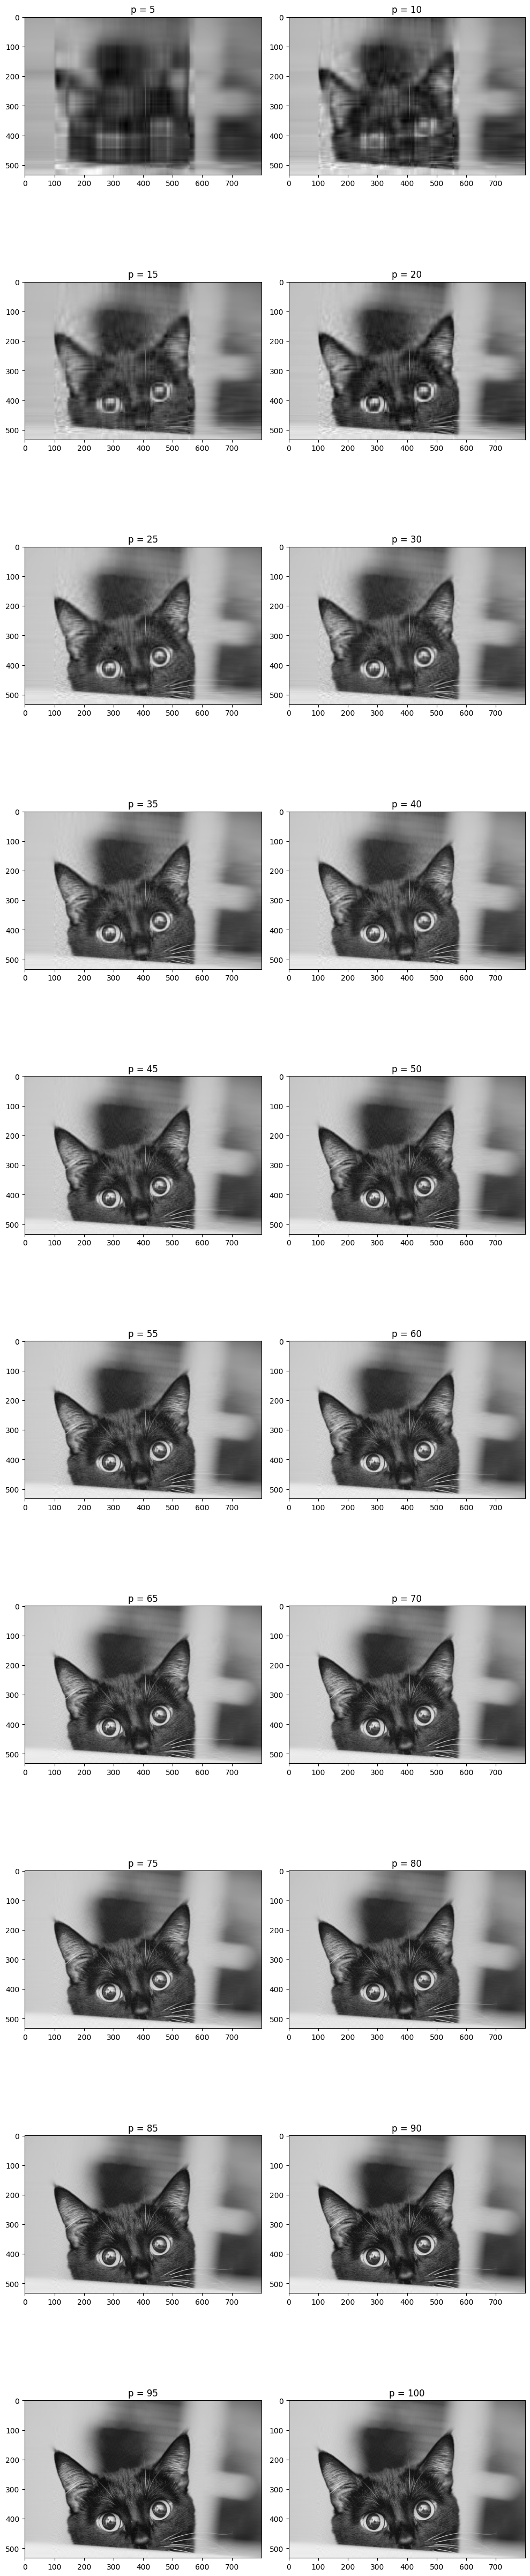

In [ ]:
p_values = list(range(5, 105, 5))

# Set up a subplot grid for displaying images
n_rows = len(p_values) // 2  # 2 columns
plt.figure(figsize=(10, 5 * n_rows))

for i, p in enumerate(p_values):
    # Extract the components for the given p
    U_p = U[:, :p]
    Sigma_p = np.diag(sigma[:p])
    V_p = V[:p, :]

    # Reconstruct the image using p singular values
    img_approx = np.dot(U_p, np.dot(Sigma_p, V_p))

    # Display the image
    plt.subplot(n_rows, 2, i + 1)
    plt.imshow(img_approx, cmap='gray')
    plt.title(f"p = {p}")

plt.tight_layout()
plt.show()